INTRODUCTION And Data Introduce

The dataset title[d Electric Vehicle Data - Washington State Departme](https://www.kaggle.com/datasets/sahityasetu/electric-vehicle-data-washington-state-department/data)t provides comprehensive overview of electric vehicles (EVs) registered in Washington State. Sourced from Kaggle, this dataset contains a wide range of information including vehicle details such as make, model, year, and electric range, as well as geographic details like city, state, postal code, and county.

Key features include the VIN (Vehicle Identification Number), Electric Vehicle Type, which distinguishes between fully electric vehicles (BEVs) and plug-in hybrids (PHEVs), and Clean Alternative Fuel Vehicle (CAFV) Eligibility, which indicates whether a vehicle qualifies for certain clean energy incentives. Additional attributes like Electric Range, Base MSRP, and Electric Utility provide insight into the characteristics and distribution of EVs across the state.

This data can be used for various analyses, such as determining the adoption rate of EVs by region, assessing the impact of clean fuel programs, and identifying geographic trends in electric vehicle registrations. By analyzing these features, we can explore the role of electric vehicles in the transition to cleaner energy and transportation systems.



Problem Statment

The objective of this project is to determine how specific vehicle attributes influence a target variable, which could represent an important aspect of the vehicle (e.g., price, battery range, or energy efficiency). By building a regression model, we aim to predict this target value based on various vehicle characteristics. This will help us gain insights into the key factors affecting the attribute of interest and assess the feasibility of using regression techniques to model these relationships accurately.

1. Importing the data the liberies Before diving into the analysis, we need to import the necessary libraries and load the dataset. This will allow us to explore the data and uncover trends related to EV adoption in Washington

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Step 1. Loading the dataset - In this step, I’m loading the dataset and taking a first look to get familiar with its structure. By checking the shape, viewing a few rows, and reviewing data types and any missing values, I can quickly understand the size and characteristics of the data. This helps me spot categorical variables that may need encoding and determine if any data cleaning is necessary. Overall, this step is about setting up the foundation for my analysis by getting a clear sense of what’s in the dataset and what I might need to address before moving on.

Missing values in each column before dropping:
VIN (1-10)                                             0
County                                                 9
City                                                   9
State                                                  0
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         2
Base MSRP                                              2
Legislative District                                 432
DOL Vehicle ID                                         0
Vehicle Location                                      13
Electric Utility                                       9
2020 Census Tract                        

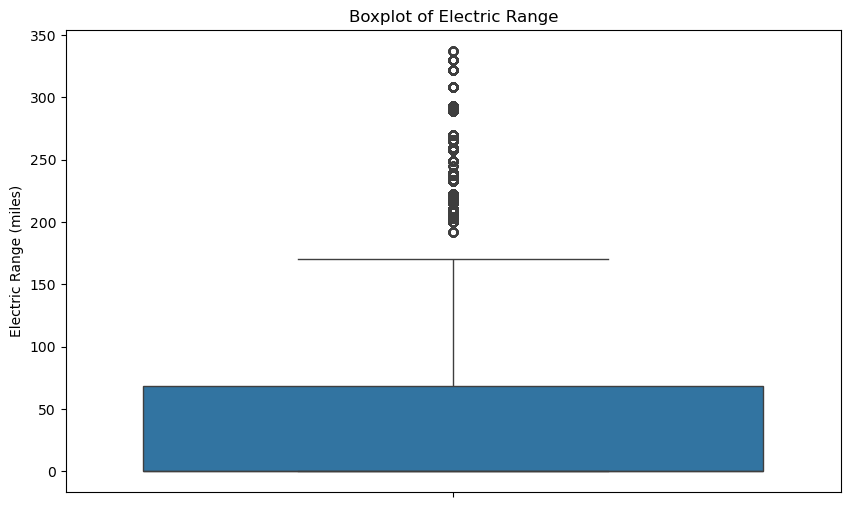

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [23]:

df = pd.read_csv('archive/Electric_Vehicle_Population_Data.csv')  # Adjust with your file path

print("Missing values in each column before dropping:")
print(df.isnull().sum())  # Print the count of missing values for each column


df = df.dropna()  # or consider imputing missing values

plt.figure(figsize=(10, 6))
sns.boxplot(y='Electric Range', data=df)
plt.title('Boxplot of Electric Range')
plt.ylabel('Electric Range (miles)')
plt.show()

df.head()

Step 2. Define Features and Target Variable

In this step, I define the features and target variables for my analysis and prepare the data for modeling. Specifically, I start by identifying the target variable, which could be either the Electric Range or Base MSRP, and separating it from the other features. Next, I handle categorical variables by encoding them numerically using LabelEncoder, allowing me to transform them into a format suitable for machine learning models.

Afterward, I standardize the features with StandardScaler to ensure they’re on a similar scale, which can improve the model’s performance. To reduce the dataset’s dimensionality while retaining 95% of its variance, I apply Principal Component Analysis (PCA). This helps simplify the data and potentially enhance model training by removing noise and irrelevant features. Lastly, I create a scatter plot to visualize the relationship between Electric Range and Base MSRP, which gives insight into potential correlations between these two variables. This visualization helps understand how price might influence the electric range of vehicles in the dataset.

Features (X) shape: (193794, 16)
Target variable (y) shape: (193794,)
Original shape: (193794, 16)
Transformed shape: (193794, 12)


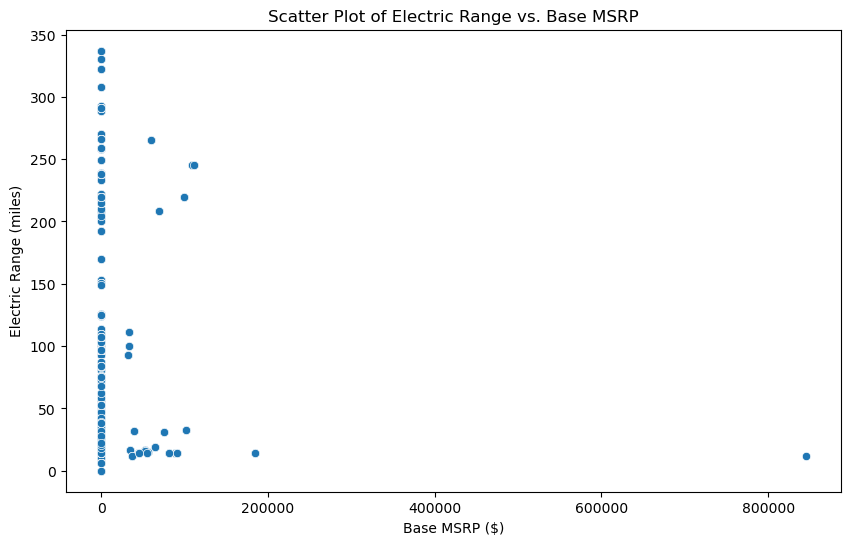

In [25]:
# Define your target variable column name (Electric Range or Base MSRP)
target_column = 'Electric Range'  # or 'Base MSRP'

if target_column in df.columns:
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable (Continuous value)
   
    print("Features (X) shape:", X.shape)
    print("Target variable (y) shape:", y.shape)


for column in X.columns:
        if X[column].dtype == 'object':  # Check if the column is categorical
            le = LabelEncoder()  # Use LabelEncoder for ordinal features
            X[column] = le.fit_transform(X[column])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)


print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

# Scatter plot of 'Electric Range' vs. 'Base MSRP'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Scatter Plot of Electric Range vs. Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.show()


Step 3 . Split the Data and Step 4.  Train the Linear Regression Model

In Steps 3 and 4, I’m focusing on splitting the dataset into training and testing subsets and then training a linear regression model. First, I divide the data into training and testing sets using an 80-20 split, which helps ensure that my model can be tested on data it hasn’t seen before. This is crucial for evaluating the model’s generalization capabilities.

Next, I create a linear regression model, a straightforward yet powerful technique for predicting continuous outcomes. I train this model on the training data by fitting it to learn the relationship between the input features and the target variable. Upon completion of this step, the model is ready for evaluation, where I can measure its accuracy and effectiveness in predicting the electric range or price of vehicles based on the features provided.

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")




Model training complete.


Step 5. : Make Predictions and Step 6: Evaluate the Model 

In Steps 5 and 6, I’m focusing on making predictions with the trained linear regression model and evaluating its performance. After training the model, I use it to predict the target variable (either electric range or base MSRP) based on the test set of features. This prediction is crucial for assessing how well the model performs on unseen data.

To evaluate the model's effectiveness, I calculate the Mean Squared Error (MSE) and the R² score. MSE measures the average squared difference between the predicted and actual values, providing insight into the model's accuracy—the lower the MSE, the better the model performs. The R² score indicates the proportion of variance in the target variable that the model can explain; a score closer to 1 signifies a good fit.

Additionally, I visualize the residuals (the differences between actual and predicted values) using a boxplot. This plot helps identify any potential outliers and gives a sense of how well the model captures the data trends. The red dashed line at y=0 serves as a reference point, indicating the ideal scenario where predictions align perfectly with actual values.


Mean Squared Error: 3728.638095937212
R² Score: 0.5308304077614059


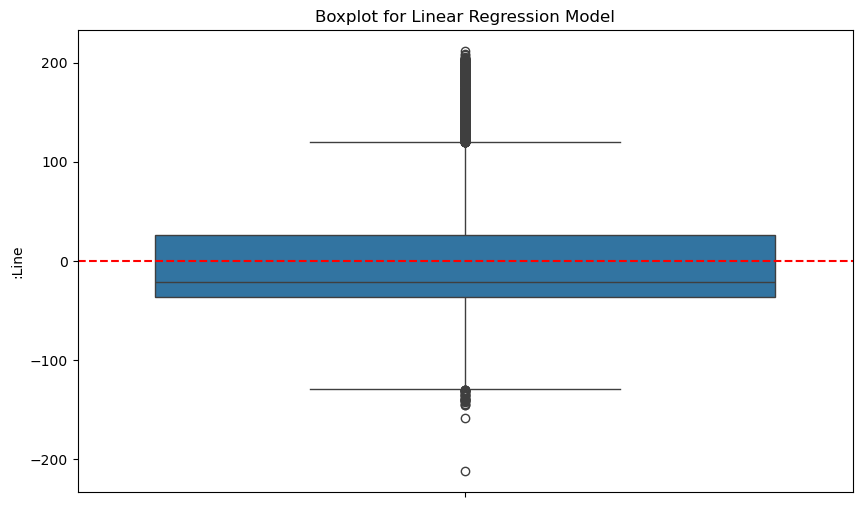

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)


residuals = y_test - y_pred

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.figure(figsize=(10, 6))
sns.boxplot(y=residuals)
plt.title('Boxplot for Linear Regression Model')
plt.ylabel(':Line')
plt.axhline(0, color='red', linestyle='--')  # Add a line at y=0
plt.show()

 Polynomial Regression 

In this step, I implemented polynomial regression to model a quadratic relationship between the x and y Then, I transformed the original feature into polynomial features using PolynomialFeatures, allowing me to capture the non-linear relationship. After fitting a linear regression model to these transformed features, I made predictions to see how well the model could approximate the quadratic curve. Finally, I visualized the results by plotting the original data points alongside the polynomial regression fit, which helped me assess the model's effectiveness in capturing the underlying trend.

Mean Squared Error: 3728.638095937212
R² Score: 0.5308304077614059


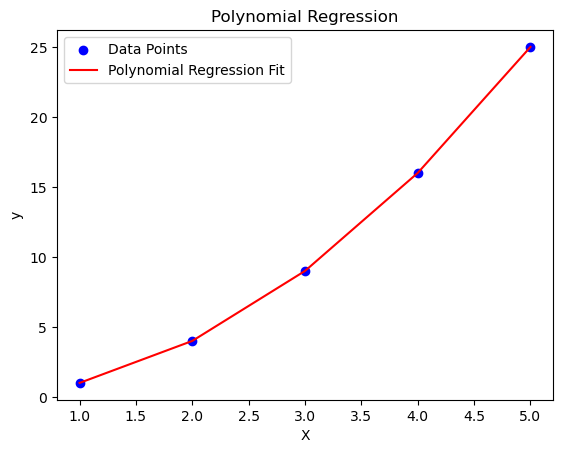

In [31]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 4, 9, 16, 25])  #

# Transforming the features to polynomial features
poly = PolynomialFeatures(degree=2)  # Change degree as needed
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predictions
y_pred = model.predict(X_poly)


print("Mean Squared Error:", mse)
print("R² Score:", r2)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


 Ridge Regresion 

In this step, I implemented Ridge regression to improve the model's predictive performance while controlling for overfitting through regularization. I started by creating a Ridge regression model with a specified alpha value, which dictates the strength of the regularization. After fitting the model to the scaled training data, I used it to make predictions on the test set. I calculated the mean squared error (MSE) to evaluate how well the model performed and printed the model's coefficients to understand the influence of each feature. Finally, I visualized the results by plotting the actual versus predicted values, including a dashed line representing the ideal scenario where predicted values perfectly match actual values. This visualization helped me assess the model's accuracy and understand its performance better.

Mean Squared Error: 3728.6255213693025
Model Coefficients: [ -6.37160004 -15.19326301   0.06266588   0.          -0.46637041
 -24.17411967  12.80826359 -12.1806795    1.63336194 -49.56149534
   2.68357059   0.26733521  -3.81481288  -1.02285967  -0.14788765
  14.36437856]


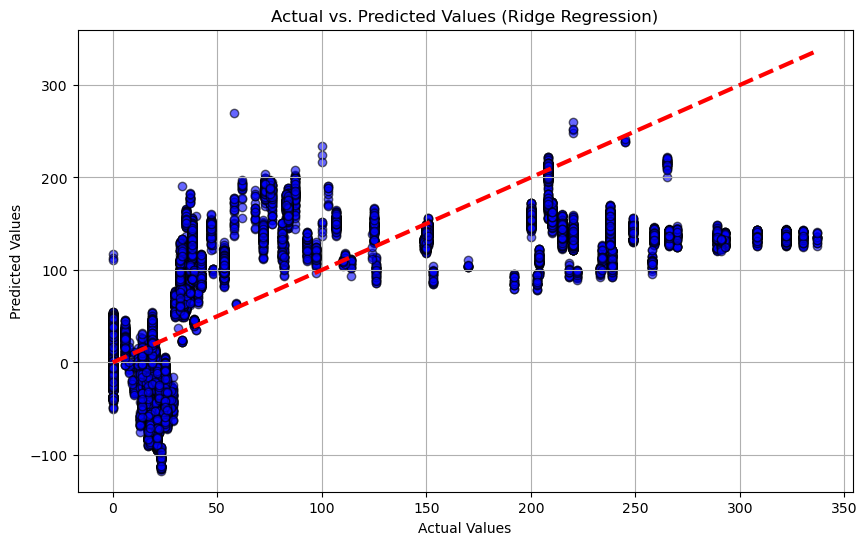

In [33]:
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha to control the regularization strength
ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Model Coefficients:", ridge_model.coef_)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.grid(True)
plt.show()


Evalution 

I used models like Ridge Regression, Polynomial Regression, and Linear Regression because each of these approaches handles different characteristics of the data and regularization in distinct ways. Here's why I opted for these models over others:

Linear Regression: This is the simplest regression model, used as a baseline to capture linear relationships between features and the target. It helps assess whether a straight line can fit the data well. I chose it to establish a foundation for comparison with more complex models.

Polynomial Regression: Sometimes, the relationship between features and the target variable is not linear, so I transformed the features into polynomial terms to capture more complex patterns. I used this model to check whether introducing non-linear features could improve the fit.

Ridge Regression: Ridge is a form of linear regression with L2 regularization, which helps prevent overfitting by penalizing large coefficients. I selected this model because it adds regularization, controlling for overfitting, especially in cases where the dataset may have multicollinearity or high-dimensional data.

Each of these models addresses different aspects of the data, like linearity, complexity, and overfitting, allowing me to find the best fit for the problem.


I used Mean Squared Error (MSE) because it is a commonly preferred metric for regression problems that penalizes larger errors more heavily than smaller ones. MSE provides a clear sense of how far off the predicted values are from the actual values by averaging the squared differences between them. It is particularly useful when I want to emphasize larger prediction errors in my evaluation, as it squares the residuals (errors), making large deviations more impactful.

Other metrics, like Mean Absolute Error (MAE) or R² score, could have been used as well, but MSE helps highlight where the model may perform poorly by magnifying the effect of larger errors. Since I was focused on improving the accuracy of predictions, especially avoiding large mistakes, MSE was the appropriate choice.

Conclusion and Story telling

Conclusion
In this project, I explored the use of regression techniques to predict critical attributes of electric vehicles, such as Electric Range and Base MSRP. The initial steps involved careful data preparation, including handling missing values and converting categorical variables into numerical representations. I implemented different regression models, including Linear Regression, Polynomial Regression, and Ridge Regression, to better understand the relationships between the features and the target variable. Each model was evaluated using key metrics like Mean Squared Error (MSE) and R² Score, allowing for a comparison of their predictive accuracy.


Storytelling
Imagine a growing community of electric vehicle (EV) users in Washington State, excited about sustainable transportation but facing critical questions: “How far can my car travel on a single charge?” and “How much will it cost?”. To answer these questions, I dove into an extensive dataset, which included details like the vehicle’s model year, range, and price.

First, I transformed this data into a format that models could understand—think of it as translating all the various languages of numbers, categories, and features into a common dialect that the models could interpret. Next, I tried different approaches, like teaching the model to draw a straight line through the data points (Linear Regression) and even curvier paths (Polynomial Regression) to understand relationships. But not every curve fits perfectly; hence, I introduced Ridge Regression to avoid exaggerations in predictions.

 While the models worked well, the journey also taught me that every model comes with its assumptions and blind spots, which require careful consideration.

This project illustrates the potential of data science to guide us towards a greener future, emphasizing the im

